<a href="https://colab.research.google.com/github/kMongru/canadian_radon_analysis/blob/main/tensflow_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import pandas as pd

In [11]:
# show inital data and shape to understand features
ds, info = tfds.load('radon', split='train', with_info=True)

# The 'activity' label is the measured radon concentration in pCi/
print(info)

tfds.core.DatasetInfo(
    name='radon',
    full_name='radon/1.0.0',
    description="""
    Radon is a radioactive gas that enters homes through contact points with the
    ground. It is a carcinogen that is the primary cause of lung cancer in
    non-smokers. Radon levels vary greatly from household to household. This dataset
    contains measured radon levels in U.S homes by county and state. The 'activity'
    label is the measured radon concentration in pCi/L. Important predictors are
    'floor' (the floor of the house in which the measurement was taken), 'county'
    (the U.S. county in which the house is located), and 'Uppm' (a measurement of
    uranium level of the soil by county).
    """,
    homepage='http://www.stat.columbia.edu/~gelman/arm/examples/radon/',
    data_path='/root/tensorflow_datasets/radon/1.0.0',
    file_format=tfrecord,
    download_size=1.71 MiB,
    dataset_size=9.15 MiB,
    features=FeaturesDict({
        'activity': float32,
        'features': Fea

In [4]:
# get all feature keys
first_row = ds.take(1)
features = {}
for row in first_row:
    features = row['features']
features = list(features.keys())
features.insert(0, 'activity')

# understanding each feature's relationship with the dependent variable (score)
df = tfds.as_dataframe(ds)
df.columns = features

df.describe()

,activity,Uppm,adjwt,cntyfips,dupflag,floor,idnum,lat,lon,pcterr,...,startdt,starttm,stfips,stopdt,stoptm,stratum,typebldg,wave,zip,zipflag
count,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,...,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000
mean,4.460781,1.974840,549.680115,67.093852,0.039291,0.525412,6290.000875,41.166817,-89.210846,13.376051,...,40997.542591,1391.979082,27.734749,41231.099658,1407.326493,3.170126,1.037143,55.599539,44976.390917,0.000875
std,9.239971,0.726788,441.200043,77.167303,0.213413,1.374195,3634.821367,4.124454,12.299222,13.274920,...,33124.239367,474.577432,12.297538,32702.448539,493.430449,3.625495,0.526701,34.132766,26113.586772,0.029567
min,0.000000,0.000000,2.081602,1.000000,0.000000,0.000000,1.000000,31.525999,-113.980003,0.000000,...,10188.000000,0.000000,4.000000,10188.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.100000,1.619770,288.889313,17.000000,0.000000,0.000000,3144.000000,39.007999,-96.369003,5.100000,...,21989.000000,1000.000000,18.000000,22188.000000,1000.000000,1.000000,1.000000,31.000000,17601.000000,0.000000
50%,2.200000,2.007850,443.843689,45.000000,0.000000,0.000000,6287.000000,41.091000,-89.514999,9.800000,...,31288.000000,1400.000000,27.000000,31488.000000,1405.000000,2.000000,1.000000,53.000000,54489.000000,0.000000
75%,4.800000,2.433430,710.826416,97.000000,0.000000,1.000000,9430.000000,43.978001,-79.087997,18.299999,...,40488.000000,1800.000000,38.000000,40488.000000,1815.000000,4.000000,1.000000,81.000000,63116.000000,0.000000
max,273.500000,3.767130,2364.762695,510.000000,2.000000,9.000000,12777.000000,48.814999,-70.257004,490.399994,...,123188.000000,2359.000000,55.000000,123188.000000,2359.000000,29.000000,5.000000,140.000000,86512.000000,1.000000


We can see some outlier in std 75% and max in activity, adjwt, cntyfips, pcterr which suggests outliers

In [35]:
df.head()

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,...,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,1.6,2.49759,292.219543,b'N',3,b'ALLEN ',0,1,1681,41.091000,...,b'IN',18,11689,2235,2,1,92,b' ',46835,0
1,0.5,2.66527,364.958313,b'N',25,b'YAVAPAI ',0,1,1457,34.599998,...,b'AZ',4,22888,1010,2,1,56,b' ',86325,0
2,3.0,2.43343,626.564575,b'Y',17,b'MIDDLESEX ',0,0,4224,42.485001,...,b'MA',25,32488,1000,1,1,23,b' ',1778,0
3,0.6,2.43343,570.611755,b'N',17,b'MIDDLESEX ',0,1,4094,42.485001,...,b'MA',25,32688,1200,1,1,62,b' ',1432,0
4,1.2,2.10811,426.798859,b'Y',95,b'JACKSON ',0,0,6849,39.007999,...,b'MO',29,32488,610,2,1,91,b' ',64134,0


In [10]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  12573 non-null  float32
 1   Uppm      12573 non-null  float32
 2   adjwt     12573 non-null  float32
 3   basement  12573 non-null  object 
 4   cntyfips  12573 non-null  int32  
 5   county    12573 non-null  object 
 6   dupflag   12573 non-null  int32  
 7   floor     12573 non-null  int32  
 8   idnum     12573 non-null  int32  
 9   lat       12573 non-null  float32
 10  lon       12573 non-null  float32
 11  pcterr    12573 non-null  float32
 12  region    12573 non-null  int32  
 13  rep       12573 non-null  int32  
 14  room      12573 non-null  int32  
 15  startdt   12573 non-null  int32  
 16  starttm   12573 non-null  int32  
 17  state     12573 non-null  object 
 18  state2    12573 non-null  object 
 19  stfips    12573 non-null  int32  
 20  st

We need to change the integer values, basement, county, state, state2, and windoor into integer values.

In [73]:
# creating new df
# setting columns we use
new_df = df[['idnum', 'basement', 'county', 'state', 'state2', 'windoor']]
new_df.head()

,idnum,basement,county,state,state2,windoor
0,1681,b'N',b'ALLEN ',b'IN',b'IN',b' '
1,1457,b'N',b'YAVAPAI ',b'AZ',b'AZ',b' '
2,4224,b'Y',b'MIDDLESEX ',b'MA',b'MA',b' '
3,4094,b'N',b'MIDDLESEX ',b'MA',b'MA',b' '
4,6849,b'Y',b'JACKSON ',b'MO',b'MO',b' '


Now let's check the number of unquie values in each category

In [74]:
len(df['idnum'].unique())

12573

In [75]:
# unique values in each columns
for x in new_df.columns:
    #prinfting unique values
    print(x ,':', len(new_df[x].unique()))

idnum : 12573
basement : 4
county : 386
state : 8
state2 : 9
windoor : 1


In [27]:
# finding the top 20 categories
new_df.windoor.value_counts().sort_values(ascending=False).head(10)



b' '    12573
Name: windoor, dtype: int64

In [28]:
new_df.basement.value_counts().sort_values(ascending=False).head(10)


b'Y'    8469
b'N'    3354
b' '     676
b'0'      74
Name: basement, dtype: int64

In [29]:
new_df.state.value_counts().sort_values(ascending=False).head(10)


b'PA'    2389
b'IN'    1914
b'MO'    1859
b'MA'    1659
b'ND'    1596
b'AZ'    1507
b'MN'     919
b'R5'     730
Name: state, dtype: int64

In [30]:
new_df.state2.value_counts().sort_values(ascending=False).head(10)

b'PA'    2389
b'IN'    1914
b'MO'    1859
b'MA'    1659
b'ND'    1596
b'AZ'    1507
b'MN'    1182
b'WI'     269
b'MI'     198
Name: state2, dtype: int64

Lets drop the windoor column and state2, then all rows where basement value = '' or '0'

In [76]:
cleaned_df = new_df[['idnum', 'state', 'basement', 'county']]
cleaned_df = cleaned_df[cleaned_df['basement'].isin([b'Y', b'N'])]
cleaned_df.head()

,idnum,state,basement,county
0,1681,b'IN',b'N',b'ALLEN '
1,1457,b'AZ',b'N',b'YAVAPAI '
2,4224,b'MA',b'Y',b'MIDDLESEX '
3,4094,b'MA',b'N',b'MIDDLESEX '
4,6849,b'MO',b'Y',b'JACKSON '


Now we should convert to integer values

In [77]:
# one-hot encode the 'basement' variable
one_hot = pd.get_dummies(cleaned_df['basement'], prefix='basement')
# concatenate the one-hot encoded DataFrame with the original DataFrame
cleaned_df = pd.concat([cleaned_df, one_hot], axis=1)

# drop the original 'basement' column
cleaned_df.drop('basement', axis=1, inplace=True)
cleaned_df.head()

,idnum,state,county,basement_b'N',basement_b'Y'
0,1681,b'IN',b'ALLEN ',1,0
1,1457,b'AZ',b'YAVAPAI ',1,0
2,4224,b'MA',b'MIDDLESEX ',0,1
3,4094,b'MA',b'MIDDLESEX ',1,0
4,6849,b'MO',b'JACKSON ',0,1


In [78]:
# one-hot encode the 'basement' variable
one_hot = pd.get_dummies(cleaned_df['state'], prefix='state')
# concatenate the one-hot encoded DataFrame with the original DataFrame
cleaned_df = pd.concat([cleaned_df, one_hot], axis=1)

# drop the original 'basement' column
cleaned_df.drop('state', axis=1, inplace=True)
cleaned_df.head()


,idnum,county,basement_b'N',basement_b'Y',state_b'AZ',state_b'IN',state_b'MA',state_b'MN',state_b'MO',state_b'ND',state_b'PA',state_b'R5'
0,1681,b'ALLEN ',1,0,0,1,0,0,0,0,0,0
1,1457,b'YAVAPAI ',1,0,1,0,0,0,0,0,0,0
2,4224,b'MIDDLESEX ',0,1,0,0,1,0,0,0,0,0
3,4094,b'MIDDLESEX ',1,0,0,0,1,0,0,0,0,0
4,6849,b'JACKSON ',0,1,0,0,0,0,1,0,0,0


In [69]:
# filter categories with more than 50 rows
min_rows = 60
categories = cleaned_df['county'].value_counts()[cleaned_df['county'].value_counts() > min_rows].index.tolist()

# filter the DataFrame based on the selected categories
df_filtered = cleaned_df[cleaned_df['county'].isin(categories)]
print(df_filtered.count())
print(len(categories))

county           6837
basement_b'N'    6837
basement_b'Y'    6837
state_b'AZ'      6837
state_b'IN'      6837
state_b'MA'      6837
state_b'MN'      6837
state_b'MO'      6837
state_b'ND'      6837
state_b'PA'      6837
state_b'R5'      6837
dtype: int64
53


In [90]:
cleaned_df = cleaned_df.drop('county', axis=1)
cleaned_df.head()

,idnum,basement_b'N',basement_b'Y',state_b'AZ',state_b'IN',state_b'MA',state_b'MN',state_b'MO',state_b'ND',state_b'PA',state_b'R5'
0,1681,1,0,0,1,0,0,0,0,0,0
1,1457,1,0,1,0,0,0,0,0,0,0
2,4224,0,1,0,0,1,0,0,0,0,0
3,4094,1,0,0,0,1,0,0,0,0,0
4,6849,0,1,0,0,0,0,1,0,0,0


In [92]:
cleaned_df.count()

idnum            11823
basement_b'N'    11823
basement_b'Y'    11823
state_b'AZ'      11823
state_b'IN'      11823
state_b'MA'      11823
state_b'MN'      11823
state_b'MO'      11823
state_b'ND'      11823
state_b'PA'      11823
state_b'R5'      11823
dtype: int64

Let's concat the old data with the new data

In [91]:
df_selected = df[['idnum','activity', 'Uppm', 'floor', 'lat', 'lon', 'zip']]
df_merged = pd.merge(cleaned_df, df_selected, on='idnum', how='inner')

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 11822
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idnum          11823 non-null  int32  
 1   basement_b'N'  11823 non-null  uint8  
 2   basement_b'Y'  11823 non-null  uint8  
 3   state_b'AZ'    11823 non-null  uint8  
 4   state_b'IN'    11823 non-null  uint8  
 5   state_b'MA'    11823 non-null  uint8  
 6   state_b'MN'    11823 non-null  uint8  
 7   state_b'MO'    11823 non-null  uint8  
 8   state_b'ND'    11823 non-null  uint8  
 9   state_b'PA'    11823 non-null  uint8  
 10  state_b'R5'    11823 non-null  uint8  
 11  activity       11823 non-null  float32
 12  Uppm           11823 non-null  float32
 13  floor          11823 non-null  int32  
 14  lat            11823 non-null  float32
 15  lon            11823 non-null  float32
 16  zip            11823 non-null  int32  
dtypes: float32(4), int32(3), uint8(10)
memory usage: 5

<Axes: >

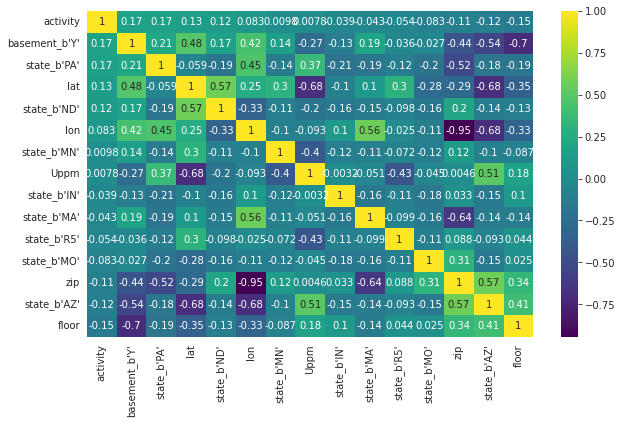

In [99]:
#Quality correlation matrix
k = 15 #number of variables for heatmap
featureSubset = df_merged.loc[:, df_merged.columns != 'idnum']
cols = featureSubset.corr().nlargest(k, 'activity')['activity'].index
cm = featureSubset[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
# check the skew and normal distr
plt.figure(figsize=(2,10))
for i in range(0,10):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

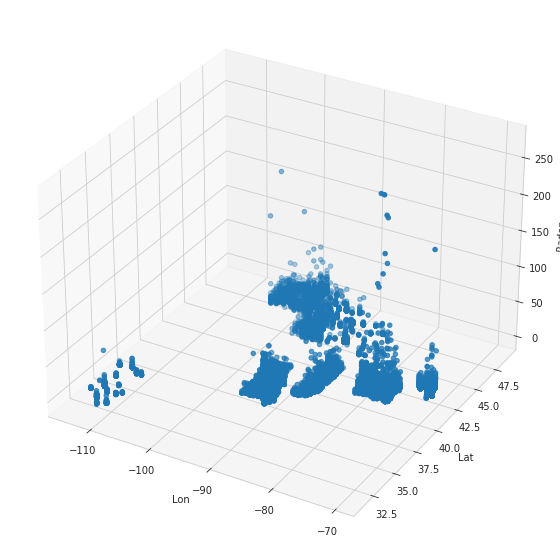

In [95]:
# combine lat/lon against radon

fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['lon'], df['lat'], df['activity'])

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_zlabel('Radon')

plt.show()



In [94]:
# Convert to 1-D series and drop Null values
# unique_corr_pairs = corr.unstack()
  
# # Sort correlation pairs
# sorted_mat = unique_corr_pairs.sort_values()
sorted_activities = corr['activity'].sort_values()
print(sorted_activities)

basement_b'N'   -0.172088
floor           -0.152721
state_b'AZ'     -0.117915
zip             -0.109356
state_b'MO'     -0.082897
state_b'R5'     -0.054006
state_b'MA'     -0.042990
state_b'IN'     -0.039445
Uppm             0.007776
state_b'MN'      0.009804
lon              0.082830
state_b'ND'      0.123239
lat              0.128948
idnum            0.158949
state_b'PA'      0.165280
basement_b'Y'    0.172088
activity         1.000000
Name: activity, dtype: float64
